# Clustering Penguins

In this notebook, we'll perform clustering on the Penguins dataset using K-means. We'll go through the following steps:


## 1. Load and clean the dataset.

I've done this for you.

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

drive.mount('/content/gdrive')
df = pd.read_csv('/content/gdrive/My Drive/datasets/penguins.csv')
df = df.dropna()
df = df.drop([9, 14])


# Inspect the results
df.head()

Mounted at /content/gdrive


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
4,36.7,19.3,193.0,3450.0,FEMALE
5,39.3,20.6,190.0,3650.0,MALE


## 2. One-Hot Encode Categorical Variables

We think the penguin `sex` might be useful for our clustering. Let's one-hot encode it.

```python
df = pd.get_dummies(df).drop("sex_.", axis=1)
```

*Inspect the dataframe after you've done this.*

In [2]:
df = pd.get_dummies(df).drop("sex_.", axis=1)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True


## 3. Scale the features

We're going to do some scaling of the features to transform them all into a range of `[0, 1]`

**Note:** Because this is an unsupervised algorithm, the whole dataframe is out `X` feature matrix!

```python
scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data=X, columns=df.columns)
```

*Inspect the dataframe after you've done this.*


In [3]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(data=X, columns=df.columns)
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.905520,0.793126,-1.428125,-0.569709,-0.991031,0.997001
1,-0.831938,0.128503,-1.071522,-0.507579,1.009050,-1.003008
2,-0.684775,0.435252,-0.429637,-1.191006,1.009050,-1.003008
3,-1.347011,1.099875,-0.572278,-0.942487,1.009050,-1.003008
4,-0.868729,1.764498,-0.786240,-0.693968,-0.991031,0.997001
...,...,...,...,...,...,...
328,0.584511,-1.763116,0.925454,0.890339,1.009050,-1.003008
329,0.510929,-1.456367,0.996775,0.797145,1.009050,-1.003008
330,1.173166,-0.740619,1.496019,1.915480,-0.991031,0.997001
331,0.216602,-1.200743,0.782813,1.232053,1.009050,-1.003008


### 4. PCA

In addition to scaling as feature engineering, we're going to reduce the number of features using Principal Component Analysis (PCA).


```python
pca = PCA(n_components=None)
dfx_pca = pca.fit(df)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
df = pd.DataFrame(pca.fit_transform(df))
```

*Inspect both the dataframe and n_components after you've done this.*

In [4]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(df)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
df = pd.DataFrame(pca.fit_transform(df))


# Determine the Number of Clusters

You have two options for determining how many cluster, you can either just guess or you can use the elbow method to plot the inertia (sum of squared distances to the nearest cluster center) for different values of k.

Here's the code for that.
```python
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()
```

With this plot, you should be able to see when a larger number of clusters starts to have diminishing returns.

Pick a number that feels right to you. Assign that number to the variable `n_clusters` before moving on.

```
n_clusters = ...
```

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

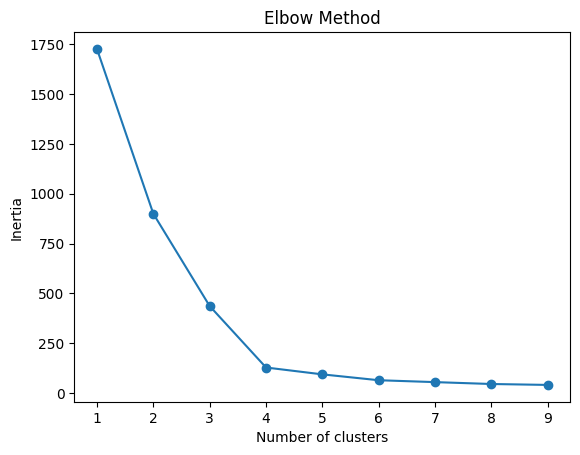

In [5]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


## 6. K-means Clustering

- Apply K-means clustering with the optimal number of clusters determined from the previous step.
  ```python
  kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df)
  ```

- Visualize the clusters on the first two principal components (it's easier to visualize things in only two dimensions).

  ```python
  plt.scatter(df.loc[:, 0], df.loc[:, 1], c=kmeans.labels_, cmap="viridis")
  plt.xlabel("First Principal Component")
  plt.ylabel("Second Principal Component")
  plt.title(f"K-means Clustering (K={n_clusters})")
  plt.show()
  ```

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


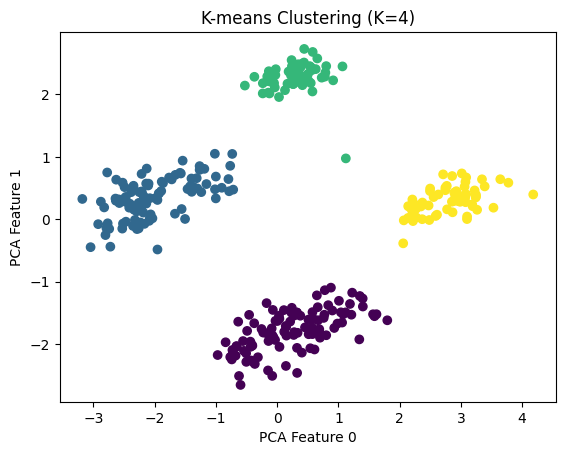

In [7]:
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(df)
plt.scatter(df.loc[:,0], df.loc[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("PCA Feature 0")
plt.ylabel("PCA Feature 1")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()